# Classification: Linear Discriminant Analysis (LDA)

Rafiq Islam  
2024-10-17

## Introduction

Linear Discriminant Analysis (LDA) is a supervised machine learning
algorithm commonly used for classification tasks. It is widely applied
when dealing with datasets where the number of predictors (features)
exceeds the number of observations, or when multicollinearity is a
concern. LDA works by projecting data onto a lower-dimensional space,
maximizing the separation between classes.

## Mathematical Foundation of LDA

Let’s assume we have a dataset $X \in \mathbb{R}^{n \times p}$
consisting of $n$ data points and $p$ features, and each data point
belongs to one of $K$ distinct classes. The goal of LDA is to find a new
space (called a discriminant space) in which the classes are maximally
separated, i.e. we want to **maximize the separability between classes**
while **minimizing the variation within each class**. This can be
mathematically expressed as finding a projection that maximizes the
ratio of between-class variance to within-class variance.

For each class $C_k$ (where $k \in \{1, 2, \dots, K\}$):

-   $\mu_k$ is the **mean vector** of class $C_k$.  
-   $\mu$ is the **overall mean** of the entire dataset.

**Class Mean**: For each class $C_k$, the mean is calculated as:

$$
\mu_k = \frac{1}{N_k} \sum_{x_i \in C_k} x_i
$$

where $N_k$ is the number of data points in class $C_k$, and $x_i$
represents individual data points.

**Overall Mean**: The mean of the entire dataset is:

$$
\mu = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

To understand how well classes are separated, we need two key measures:

1.  **Within-Class Scatter Matrix $S_W$**  
    The within-class scatter matrix measures how the data points of each
    class deviate from the class mean. It captures the **spread of data
    points within each class**. For class $C_k$, the scatter matrix is
    calculated as:  
    $$
     S_W = \sum_{k=1}^{K} \sum_{x_i \in C_k} (x_i - \mu_k)(x_i - \mu_k)^T
     $$

    This formula is saying that for each class $C_k$, we calculate the
    distance of every point $x_i$ from the mean of its class $\mu_k$,
    and then sum these squared distances across all classes.

2.  **Between-Class Scatter Matrix $S_B$**  
    The between-class scatter matrix measures how the **class means
    deviate from the overall mean**. It captures how well-separated the
    classes are.

    $$
     S_B = \sum_{k=1}^{K} N_k (\mu_k - \mu)(\mu_k - \mu)^T
     $$

    In this case, for each class $C_k$, we calculate the distance
    between the mean of class $\mu_k$ and the overall mean $\mu$, then
    scale this by the number of points in class $C_k$.

------------------------------------------------------------------------

LDA aims to find a transformation that maximizes the separation between
classes. This is done by finding a linear projection $\mathbf{w}$ such
that the **between-class scatter is maximized** and the **within-class
scatter is minimized**. Mathematically, the optimization problem
becomes:

$$
J(\mathbf{w}) = \frac{\mathbf{w}^T S_B \mathbf{w}}{\mathbf{w}^T S_W \mathbf{w}}
$$

-   $S_B \mathbf{w}$ captures the between-class variance (how
    well-separated the classes are in the new projection).  
-   $S_W \mathbf{w}$ captures the within-class variance (how tightly
    packed the points of the same class are in the new projection).

This ratio $J(\mathbf{w})$ is known as the **Fisher’s discriminant
ratio**. The goal is to find $\mathbf{w}$ that maximizes this ratio. To
maximize the Fisher’s discriminant ratio, we need to solve the following
generalized eigenvalue problem:

$$
S_W^{-1} S_B \mathbf{w} = \lambda \mathbf{w}
$$

Here, $\mathbf{w}$ is the vector that defines the linear combination of
features that maximizes class separation, and $\lambda$ is an eigenvalue
that represents how much variance is explained by that direction.

The solution to this equation gives us the eigenvectors (directions) and
eigenvalues (variances) of the transformed space. We select the top
eigenvectors corresponding to the largest eigenvalues to form the
projection matrix $W$.

------------------------------------------------------------------------

## Dimensionality Reduction

The LDA transformation reduces the dimensionality of the data by
projecting it onto a subspace spanned by the eigenvectors with the
largest eigenvalues. For a dataset with $K$ classes, LDA can reduce the
data to at most $K-1$ dimensions because $S_B$ has rank $K-1$. <br><br>
If we have two classes, LDA will reduce the data to a one-dimensional
subspace. For three classes, LDA can project the data onto a
two-dimensional subspace, and so on.

------------------------------------------------------------------------

Now before diving into the python code, let’s do some math by hand so
that we can understand the skeleton of the process. Let’s create a small
dataset with 6 features and 4 observations divided into 3 classes. We
will use this dataset to manually go through the Linear Discriminant
Analysis (LDA) process step by step.

### Dataset

| Observation | Feature 1 | Feature 2 | Feature 3 | Feature 4 | Feature 5 | Feature 6 | Class |
|-----------|---------|---------|---------|---------|---------|---------|-------|
| $x_1$       | 2         | 3         | 4         | 5         | 6         | 7         | $C_1$ |
| $x_2$       | 3         | 4         | 5         | 6         | 7         | 8         | $C_1$ |
| $x_3$       | 6         | 5         | 4         | 3         | 2         | 1         | $C_2$ |
| $x_4$       | 7         | 6         | 5         | 4         | 3         | 2         | $C_3$ |

Now, we’ll walk through the mathematical steps of LDA for this small
dataset.

### 1. Compute Class Means $\mu_k$ for each class:

-   Class $C_1$ (mean of $x_1$ and $x_2$): $$
    \mu_1 = \frac{1}{2} \left( \begin{bmatrix} 2 \\ 3 \\ 4 \\ 5 \\ 6 \\ 7 \end{bmatrix} + \begin{bmatrix} 3 \\ 4 \\ 5 \\ 6 \\ 7 \\ 8 \end{bmatrix} \right) = \begin{bmatrix} 2.5 \\ 3.5 \\ 4.5 \\ 5.5 \\ 6.5 \\ 7.5 \end{bmatrix}
    $$

-   Class $C_2$ (only one observation $x_3$): $$
    \mu_2 = \begin{bmatrix} 6 \\ 5 \\ 4 \\ 3 \\ 2 \\ 1 \end{bmatrix}
     $$

-   Class $C_3$ (only one observation $x_4$): $$
    \mu_3 = \begin{bmatrix} 7 \\ 6 \\ 5 \\ 4 \\ 3 \\ 2 \end{bmatrix}
     $$

### 2. Compute Overall Mean $\mu$:

We compute the overall mean $\mu$, which is the average of all
observations from all classes:

$$
\mu = \frac{1}{4} \left( \begin{bmatrix} 2 \\ 3 \\ 4 \\ 5 \\ 6 \\ 7 \end{bmatrix} + \begin{bmatrix} 3 \\ 4 \\ 5 \\ 6 \\ 7 \\ 8 \end{bmatrix} + \begin{bmatrix} 6 \\ 5 \\ 4 \\ 3 \\ 2 \\ 1 \end{bmatrix} + \begin{bmatrix} 7 \\ 6 \\ 5 \\ 4 \\ 3 \\ 2 \end{bmatrix} \right)= \frac{1}{4} \begin{bmatrix} 18 \\ 18 \\ 18 \\ 18 \\ 18 \\ 18 \end{bmatrix} = \begin{bmatrix} 4.5 \\ 4.5 \\ 4.5 \\ 4.5 \\ 4.5 \\ 4.5 \end{bmatrix}
$$

### 3. **Compute the Within-Class Scatter Matrix $S_W$**:

For each class $C_k$, the within-class scatter matrix $S_W$ is computed
as:

$$
S_W = \sum_{k=1}^{K} \sum_{x_i \in C_k} (x_i - \mu_k)(x_i - \mu_k)^T
$$

For $C_1$, the within-class scatter matrix is:

$$
(x_1 - \mu_1) = \begin{bmatrix} 2 \\ 3 \\ 4 \\ 5 \\ 6 \\ 7 \end{bmatrix} - \begin{bmatrix} 2.5 \\ 3.5 \\ 4.5 \\ 5.5 \\ 6.5 \\ 7.5 \end{bmatrix} = \begin{bmatrix} -0.5 \\ -0.5 \\ -0.5 \\ -0.5 \\ -0.5 \\ -0.5 \end{bmatrix}; \hspace{6mm} (x_2 - \mu_1) = \begin{bmatrix} 3 \\ 4 \\ 5 \\ 6 \\ 7 \\ 8 \end{bmatrix} - \begin{bmatrix} 2.5 \\ 3.5 \\ 4.5 \\ 5.5 \\ 6.5 \\ 7.5 \end{bmatrix} = \begin{bmatrix} 0.5 \\ 0.5 \\ 0.5 \\ 0.5 \\ 0.5 \\ 0.5 \end{bmatrix}
$$

For class $C_1$, the scatter matrix is:

For classes $C_2$ and $C_3$, there is only one data point in each, so
there is no within-class scatter:

$$
S_{W2} = 0, \quad S_{W3} = 0
$$

Thus, the total within-class scatter matrix is:

$$
S_W = S_{W1} + S_{W2} + S_{W3} = S_{W1}
$$

$$
S_W = \begin{bmatrix} 0.5 & 0.5 & 0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & 0.5 & 0.5 & 0.5 \\ 0.5 & 0.5 & 0.5 & 0.5 & 0.5 & 0.5 \end{bmatrix}
$$

### 4. Compute the Between-Class Scatter Matrix $S_B$:

For each class $C_k$, the between-class scatter matrix is computed as:

$$
S_B = \sum_{k=1}^{K} N_k (\mu_k - \mu)(\mu_k - \mu)^T
$$

For class $C_1$ (where $N_1 = 2$):

$$
(\mu_1 - \mu) = \begin{bmatrix} 2.5 \\ 3.5 \\ 4.5 \\ 5.5 \\ 6.5 \\ 7.5 \end{bmatrix} - \begin{bmatrix} 4.5 \\ 4.5 \\ 4.5 \\ 4.5 \\ 4.5 \\ 4.5 \end{bmatrix} = \begin{bmatrix} -2 \\ -1 \\ 0 \\ 1 \\ 2 \\ 3 \end{bmatrix}
$$

Thus, for $C_1$:

For $C_2$ (where $N_2 = 1$):

$$
(\mu_2 - \mu) = \begin{bmatrix} 6 \\ 5 \\ 4 \\ 3 \\ 2 \\ 1 \end{bmatrix} - \begin{bmatrix} 4.5 \\ 4.5 \\ 4.5 \\ 4.5 \\ 4.5 \\ 4.5 \end{bmatrix} = \begin{bmatrix} 1.5 \\ 0.5 \\ -0.5 \\ -1.5 \\ -2.5 \\ -3.5 \end{bmatrix}
$$

The between-class scatter matrix for $C_2$ is:

For $C_3$ (where $N_3 = 1$):

$$
(\mu_3 - \mu) = \begin{bmatrix} 7 \\ 6 \\ 5 \\ 4 \\ 3 \\ 2 \end{bmatrix} - \begin{bmatrix} 4.5 \\ 4.5 \\ 4.5 \\ 4.5 \\ 4.5 \\ 4.5 \end{bmatrix} = \begin{bmatrix} 2.5 \\ 1.5 \\ 0.5 \\ -0.5 \\ -1.5 \\ -2.5 \end{bmatrix}
$$

The between-class scatter matrix for $C_3$ is:

Total Between-Class Scatter Matrix $S_B$:

Adding the matrices gives:

$$
S_B = \begin{bmatrix} 16.5 & 8.5 & 0.5 & -7.5 & -15.5 & -23.5 \\ 8.5 & 4.5 & 0.5 & -3.5 & -7.5 & -11.5 \\ 0.5 & 0.5 & 0.5 & 0.5 & 0.5 & 0.5 \\ -7.5 & -3.5 & 0.5 & 4.5 & 8.5 & 12.5 \\ -15.5 & -7.5 & 0.5 & 8.5 & 16.5 & 24.5 \\ -23.5 & -11.5 & 0.5 & 12.5 & 24.5 & 36.5 \end{bmatrix}
$$

### 5. Solve the Eigenvalue Problem:

We now solve the eigenvalue problem:  
$$
S_W^{-1} S_B \mathbf{w} = \lambda \mathbf{w}
$$

The solution to this eigenvalue problem gives us the eigenvalues
$\lambda$ (which quantify the amount of variance captured in each
direction) and the eigenvectors $\mathbf{w}$ (which give the directions
of maximum class separation). The eigenvector corresponding to the
largest eigenvalue defines the direction of the first discriminant axis,
which is the direction that maximally separates the classes.

The eigenvalues of the matrix are:

$$
\lambda_1 = 6.00, \quad \lambda_2 = 1.78 \times 10^{-15}, \quad \lambda_3 = 9.86 \times 10^{-32}, \quad \lambda_4 = 0.00, \quad \lambda_5 = -5.47 \times 10^{-48}, \quad \lambda_6 = -5.95 \times 10^{-16}
$$

The two largest eigenvalues are:

1.  $\lambda_1 = 6.00$
2.  $\lambda_2 = 1.78 \times 10^{-15}$

The corresponding eigenvectors for the two largest eigenvalues are:

$$
\mathbf{w_1} = \begin{bmatrix} 
-0.408 \\
-0.408 \\
-0.408 \\
-0.408 \\
-0.408 \\
-0.408 \end{bmatrix}, \quad
\mathbf{w_2} = \begin{bmatrix} 
-0.848 \\
-0.237 \\
-0.237 \\
-0.237 \\
-0.237 \\
-0.237 \end{bmatrix}
$$

By projecting the data onto the eigenvector $\mathbf{w}$, we transform
the original dataset into a lower-dimensional space where class
separability is maximized. For this dataset, since there are 3 classes,
LDA will find up to $K-1 = 2$ discriminant axes. Let’s see how.

The matrix formed by the two largest eigenvectors is:

$$
W=\begin{bmatrix} 
-0.408 & -0.848 \\
-0.408 & -0.237 \\
-0.408 & -0.237 \\
-0.408 & -0.237 \\
-0.408 & -0.237 \\
-0.408 & -0.237 \end{bmatrix}
$$

This matrix represents the projection directions corresponding to the
two largest eigenvalues in the Linear Discriminant Analysis process.
With the eigenvectors $\mathbf{w}_1$ and $\mathbf{w}_2$, we can now
project our original dataset onto the new 2D subspace. <br><br> Now, let
$X$ represent our original dataset (where each row corresponds to an
observation and each column to a feature). The projection of the
original data onto the new 2D subspace is given by:

$$
Y = X W
$$

Where:

-   $X$ is the $4 \times 6$ matrix (4 observations, 6 features),
-   $W$ is the $6 \times 2$ matrix of eigenvectors.

After multiplying $X$ by $W$, we obtain the projected data matrix $Y$,
which is a $4 \times 2$ matrix (4 observations, 2 features):

$$
Y = \begin{bmatrix}
y_{11} & y_{12} \\
y_{21} & y_{22} \\
y_{31} & y_{32} \\
y_{41} & y_{42}
\end{bmatrix}
$$

This matrix $Y$ represents the data in the new 2D space where class
separability is maximized. So for our data

### Step 6: Visualizing the Results

If we were to plot the projected data in this new 2D space, we would see
the observations from different classes are better separated, which is
the ultimate goal of LDA. The two axes of this 2D space correspond to
the two linear discriminants that maximize the separation between the
classes.

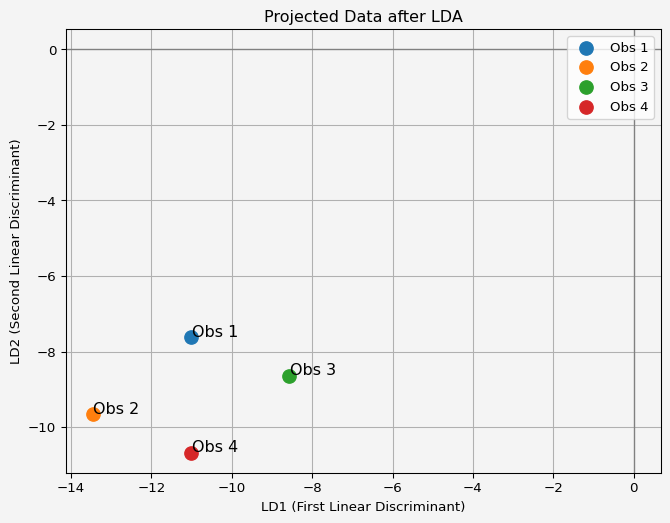

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[2, 3, 4, 5, 6, 7],
                  [3, 4, 5, 6, 7, 8],
                  [6, 5, 4, 3, 2, 1],
                  [7, 6, 5, 4, 3, 2]])

W = np.array([[-0.408, -0.848],
                         [-0.408, -0.237],
                         [-0.408, -0.237],
                         [-0.408, -0.237],
                         [-0.408, -0.237],
                         [-0.408, -0.237]])

Y = np.dot(X, W)

# Visualize the projection
plt.figure(figsize=(8, 6))
for i in range(Y.shape[0]):
    plt.scatter(Y[i, 0], Y[i, 1], label=f'Obs {i+1}', s=100)
    plt.text(Y[i, 0] + 0.02, Y[i, 1] + 0.02, f'Obs {i+1}', fontsize=12)

plt.title("Projected Data after LDA")
plt.xlabel('LD1 (First Linear Discriminant)')
plt.ylabel('LD2 (Second Linear Discriminant)')
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.grid(True)
plt.legend(loc='upper right')
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.gca().set_facecolor('#f4f4f4')
plt.show()

------------------------------------------------------------------------

### Summary of the Process of Eigenvalue Problem

1.  **Eigenvalue Calculation**: We found the eigenvalues $\lambda_1$ and
    $\lambda_2$ to be the largest, indicating the directions with the
    most class separability. We did find only two eigenvaleus since
    total class is 3.
2.  **Eigenvector Calculation**: We computed the eigenvectors
    $\mathbf{w}_1$ and $\mathbf{w}_2$ corresponding to these
    eigenvalues. These eigenvectors define the directions in the
    original feature space along which the class separation is
    maximized.
3.  **Projection**: We projected the original dataset onto the new 2D
    subspace spanned by the eigenvectors. This resulted in a new dataset
    in 2D, where the different classes are more separable.

This completes the detailed walkthrough of solving the eigenvalue
problem in LDA for our example dataset.

------------------------------------------------------------------------

### Final Summary

-   **Within-class scatter matrix** $S_W$ quantifies the spread of data
    points within each class, and we calculated it for each class.
-   **Between-class scatter matrix** $S_B$ quantifies the separation
    between the class means, and we calculated it using the mean of each
    class and the overall mean.
-   Solving the **eigenvalue problem**
    $S_W^{-1} S_B \mathbf{w} = \lambda \mathbf{w}$ gives us the
    directions $\mathbf{w}$ (eigenvectors) that maximize class
    separation.

This is how LDA works step by step, using a small dataset as an example.

## Python Code Example

Let’s now revisit the Python code, with an understanding of the math
behind LDA. First build our own classifier

In [2]:
class CustomLDA:
    def __init__(self,n_components = None) -> None:
        """
        Parameters:
        n_components: int, optional (default=None)
                      Number of components to keep. If None, all components are kept
        """
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None 
        self.mean_vectors = None 
        self.class_means = None
    
    def fit(self, X, y):
        """
        Parameters:
        X: ndarray of shape (n_samples, n_features)
        y: ndarray of shape (n_samples,)
           Target labels (must be categorical)
        """
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Step1: Compute the class means mu_k for each class 
        self.mean_vectors = []
        for c in class_labels:
            self.mean_vectors.append(np.mean(X[y==c], axis=0))
        
        # Step 2: Compute the within-class scatter matrix S_W 
        S_W = np.zeros((n_features, n_features))
        for c in class_labels:
            class_scatter = np.cov(X[y==c].T, bias=True) # Covariance matrix for each class
            S_W += class_scatter * (X[y==c].shape[0])

        # Step 3: Compute the between-class scatter matrix S_B
        overall_mean = np.mean(X, axis=0)
        S_B = np.zeros((n_features, n_features))


        for i,mean_vector in enumerate(self.mean_vectors):
            n = X[y == class_labels[i]].shape[0]
            mean_differences = (mean_vector -overall_mean).reshape(n_features,1)
            S_B += n*(mean_differences).dot(mean_differences.T)
        
        # Step 4: Solve the Eigenvalue problem 
        eigvalues, eigvectors = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))

        # Step 5: Sort the Eigenvalues and corresponding eigenvectors 
        eigvalues_sort_idx = np.argsort(np.abs(eigvalues))[::-1]
        self.eigenvalues = eigvalues[eigvalues_sort_idx]
        self.eigenvectors = eigvectors[:,eigvalues_sort_idx]

        # Step 6: Keep only the top n_components
        if self.n_components:
            self.eigenvectors = self.eigenvectors[:,:self.n_components]
        
        self.class_means = np.dot(self.mean_vectors, self.eigenvectors)
    
    def transform(self,X):
        """
        Project the data onto the LDA components 

        Parameters:
        X: ndarray of shape (n_samples, n_features)

        Returns:
        X_transformed: ndarray of shape (n_samples, n_features)
        """
        return np.dot(X,self.eigenvectors)
    
    def fit_transform(self, X, y):
        """
        Fit the LDA model and transform the data.
        
        Parameters:
        X : ndarray of shape (n_samples, n_features)
            Training data.
        y : ndarray of shape (n_samples,)
            Target labels (must be categorical).
        
        Returns:
        X_transformed : ndarray of shape (n_samples, n_components)
            Transformed data after fitting.
        """
        self.fit(X, y)
        return self.transform(X)
    
    def predict(self, X):
        """
        Predict the class labels for new data points.

        Parameters:
        X : ndarray of shape (n_samples, n_features)
            New data to classify.

        Returns:
        Predictions: ndarray of shape (n_samples,)
                     Predicted class labels
        """
        X_projected = self.transform(X)

        predictions = []
        for x in X_projected:
            distances = np.linalg.norm(x-self.class_means, axis=1)
            predictions.append(np.argmin(distances))
        
        return np.array(predictions)

    
    def explained_variance_ratio(self):
        """
        Return the percentage of variance explained by each of the selected components

        Returns:
        explained_variance: ndarray of shape (n_components,)
                            Percentage of variance explained by each selected components
        """
        total = np.sum(self.eigenvalues)

        return [(i/total) for i in self.eigenvalues[:self.n_components]]

Next we apply both the custom classifier and the classifier from the
`scikit-learn` library.

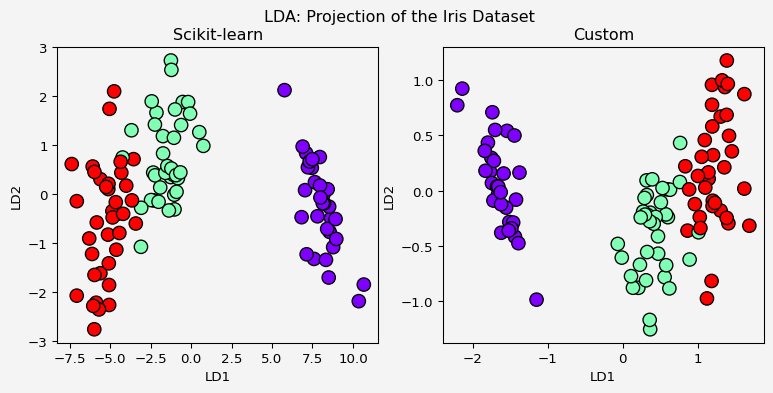

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the dataset (optional but often improves performance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply LDA from the scikit-learn library
lda1 = LDA(n_components=2)  # Reduce to 2 dimensions
X_train_lda1 = lda1.fit_transform(X_train, y_train)
X_test_lda1 = lda1.transform(X_test)

# Apply LDA from the custom built classifier
lda2 = CustomLDA(n_components=2)  # Reduce to 2 dimensions
X_train_lda2 = lda2.fit_transform(X_train, y_train)
X_test_lda2 = lda2.transform(X_test)

# Visualize the LDA-transformed data
fig, axes = plt.subplots(1,2, figsize=(9.5,4))

axes[0].scatter(X_train_lda1[:, 0], X_train_lda1[:, 1], c=y_train, cmap='rainbow', edgecolor='k', s=100)
axes[0].set_xlabel('LD1')
axes[0].set_ylabel('LD2')
axes[0].set_title('Scikit-learn')
axes[1].scatter(X_train_lda2[:, 0], X_train_lda2[:, 1], c=y_train, cmap='rainbow', edgecolor='k', s=100)
axes[1].set_xlabel('LD1')
axes[1].set_ylabel('LD2')
axes[1].set_title('Custom')
for ax in axes:
    ax.set_facecolor('#f4f4f4')
plt.gcf().patch.set_facecolor('#f4f4f4')
fig.suptitle('LDA: Projection of the Iris Dataset')
plt.show()

Next, apply LDA as a classifiers for the actual classification

In [4]:
lda_classifier1 = LDA()
lda_classifier1.fit(X_train, y_train)
y_pred1 = lda_classifier1.predict(X_test)

lda_classifier2 = CustomLDA()
lda_classifier2.fit(X_train, y_train)
y_pred2 = lda_classifier2.predict(X_test)


# Check accuracy
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'sklearn LDA Classifier Accuracy: {accuracy1 * 100:.2f}% and \ncustom LDA Classifier Accuracy: {accuracy2 * 100:.2f}%')

sklearn LDA Classifier Accuracy: 100.00% and 
custom LDA Classifier Accuracy: 95.56%

Not too bad, huh! Let’s see the confusion matrix for our custom
classifier

In [5]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred2)

print(pd.DataFrame(
    conf_mat, 
    columns=['Pred: Setosa','Pred: Virginica', 'Pred: Versicolor'],
    index=['Actual: Setosa','Actual: Virginica', 'Actual: Versicolor']
))

                    Pred: Setosa  Pred: Virginica  Pred: Versicolor
Actual: Setosa                19                0                 0
Actual: Virginica              0               11                 2
Actual: Versicolor             0                0                13

------------------------------------------------------------------------

## Conclusion

Linear Discriminant Analysis (LDA) is a powerful technique for
dimensionality reduction and classification. Its goal is to find
directions (linear combinations of the original features) that best
separate the classes by maximizing between-class variance while
minimizing within-class variance.

### Disclaimer

For the mathematical explanation, I used generative AI to produce the
matrices and vectors and their manipulations. So it won’t be surprising
if a calculation mistake is found. The custom python class was created
by the help of ChatGPT4

## References

-   Fisher, R.A. (1936). “The Use of Multiple Measurements in Taxonomic
    Problems.” *Annals of Eugenics*, 7(2), 179–188.  
-   Murphy, K. P. (2012). *Machine Learning: A Probabilistic
    Perspective*. MIT Press.  
-   Strang, G. (2016). *Introduction to Linear Algebra* (5th ed.).
    Wellesley-Cambridge Press.  
-   Lay, D. C. (2011). *Linear Algebra and Its Applications* (4th ed.).
    Pearson.

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/lda/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/lda/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/lda/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

------------------------------------------------------------------------

**You may also like**